## PHOENIX MODEL

In [1]:
import pandas as pd
prev_la_weather = pd.read_csv('north_cali_oregon_area.csv')
prev_la_weather.head()

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
0,0,2016-01-01,-6,13,0.0,1029,-2
1,1,2016-01-02,-7,11,0.0,1023,-3
2,2,2016-01-03,-4,9,2.9,1015,-2
3,3,2016-01-04,1,12,1.1,1018,4
4,4,2016-01-05,1,6,0.0,1003,2


In [2]:
prev_la_weather.tail()

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
1730,1730,2020-09-26,13,8,1.1,1021,14
1731,1731,2020-09-27,18,4,0.0,1027,20
1732,1732,2020-09-28,22,10,0.0,1023,25
1733,1733,2020-09-29,26,5,0.0,1018,29
1734,1734,2020-09-30,25,3,0.0,1022,28


In [3]:
start_dates=['2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01']
end_dates=['2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31']

In [4]:
import requests
def get_weather(lat, lon):
    city_dat = []
    dates, temp, wind, precip, pressure, heat = [], [] ,[], [], [], []
    for i in range(len(start_dates)):
#         res_str = f'http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=7b7c4ad8a29e48c3a51114119200310&q={city}&format=json&date={start_dates[i]}&enddate={end_dates[i]}'
        res_str = f'http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=7b7c4ad8a29e48c3a51114119200310&q={lat},{lon}&format=json&date={start_dates[i]}&enddate={end_dates[i]}'

        city_dat.append(res_str)
#     print(city_dat[0])
        res = requests.get(res_str).json()['data']['weather']
        for j in range(len(res)):
            dates.append(res[j]['date'])
            temp.append(res[j]['avgtempC'])
            wind.append(res[j]['hourly'][4]['windspeedKmph'])
            precip.append(res[j]['hourly'][4]['precipMM'])
            pressure.append(res[j]['hourly'][4]['pressure'])
            heat.append(res[j]['hourly'][4]['HeatIndexC'])
    city_df = pd.DataFrame({
        "Dates":dates,
        "Temperature": temp,
        "Wind Speed": wind,
        "Precipitation": precip,
        "Pressure": pressure,
        "Heat Index": heat
    })
#     city_df.to_csv(f'{city}.csv')
    city_df.to_csv('north_cali_oregon_area.csv')
    print("OK")

In [5]:
# test
get_weather(lat=44.670,lon=-121.977)

OK


In [6]:
new_la_weather = pd.read_csv('north_cali_oregon_area.csv')

In [7]:
new_la_weather.head()

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
0,0,2015-03-01,2,1,0.0,1020,10
1,1,2015-03-02,1,6,0.0,1014,7
2,2,2015-03-03,1,6,0.0,1022,8
3,3,2015-03-04,2,3,0.0,1023,12
4,4,2015-03-05,4,6,0.0,1025,13


In [8]:
final_la_weather = pd.concat([new_la_weather,prev_la_weather])
final_la_weather

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
0,0,2015-03-01,2,1,0.0,1020,10
1,1,2015-03-02,1,6,0.0,1014,7
2,2,2015-03-03,1,6,0.0,1022,8
3,3,2015-03-04,2,3,0.0,1023,12
4,4,2015-03-05,4,6,0.0,1025,13
...,...,...,...,...,...,...,...
1730,1730,2020-09-26,13,8,1.1,1021,14
1731,1731,2020-09-27,18,4,0.0,1027,20
1732,1732,2020-09-28,22,10,0.0,1023,25
1733,1733,2020-09-29,26,5,0.0,1018,29


In [10]:
final_la_weather.to_csv('final_la_weather.csv')

---
## WEATHER COMPLETE, LA FIRE TIME

In [11]:
final_la_fire = pd.read_csv('la_fire_data.csv')

In [12]:
final_la_fire

,Unnamed: 0,Unnamed: 0.1,Latitude,Longitude,Date,Fire Intensity,Brightness,dist
0,4259,4259,45.0642,-122.6501,2015-03-16,4.0,300.4,68.834236
1,21647,21647,44.3492,-121.6528,2015-04-30,56.1,331.1,43.983546
2,21648,21648,44.3531,-121.6337,2015-04-30,77.3,338.7,44.541548
3,22972,22972,44.8671,-122.7219,2015-05-05,5.0,301.4,62.775895
4,24520,24520,44.3000,-121.6532,2015-05-17,27.8,323.0,48.517732
...,...,...,...,...,...,...,...,...
8518,751902,70348,44.8590,-122.0850,2020-09-30,10.2,315.6,22.686774
8519,751933,70379,44.8190,-121.6000,2020-09-30,9.9,318.8,34.084096
8520,751969,70415,44.8370,-121.5400,2020-09-30,12.6,324.2,39.198786
8521,752059,70505,44.8290,-121.5900,2020-09-30,8.5,318.0,35.317873


In [13]:
# remove unnamed columns
df = final_la_fire
df = df.loc[:, ~df.columns.str.contains('^Unnamed')].drop(columns=['Latitude', 'Longitude'])
df

,Date,Fire Intensity,Brightness,dist
0,2015-03-16,4.0,300.4,68.834236
1,2015-04-30,56.1,331.1,43.983546
2,2015-04-30,77.3,338.7,44.541548
3,2015-05-05,5.0,301.4,62.775895
4,2015-05-17,27.8,323.0,48.517732
...,...,...,...,...
8518,2020-09-30,10.2,315.6,22.686774
8519,2020-09-30,9.9,318.8,34.084096
8520,2020-09-30,12.6,324.2,39.198786
8521,2020-09-30,8.5,318.0,35.317873


In [14]:
# reassign to good var name
final_la_fire = df
final_la_fire = final_la_fire.rename(columns={'Date':"Dates"})
final_la_fire

,Dates,Fire Intensity,Brightness,dist
0,2015-03-16,4.0,300.4,68.834236
1,2015-04-30,56.1,331.1,43.983546
2,2015-04-30,77.3,338.7,44.541548
3,2015-05-05,5.0,301.4,62.775895
4,2015-05-17,27.8,323.0,48.517732
...,...,...,...,...
8518,2020-09-30,10.2,315.6,22.686774
8519,2020-09-30,9.9,318.8,34.084096
8520,2020-09-30,12.6,324.2,39.198786
8521,2020-09-30,8.5,318.0,35.317873


In [15]:
final_la_weather

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
0,0,2015-03-01,2,1,0.0,1020,10
1,1,2015-03-02,1,6,0.0,1014,7
2,2,2015-03-03,1,6,0.0,1022,8
3,3,2015-03-04,2,3,0.0,1023,12
4,4,2015-03-05,4,6,0.0,1025,13
...,...,...,...,...,...,...,...
1730,1730,2020-09-26,13,8,1.1,1021,14
1731,1731,2020-09-27,18,4,0.0,1027,20
1732,1732,2020-09-28,22,10,0.0,1023,25
1733,1733,2020-09-29,26,5,0.0,1018,29


In [16]:
final_la_fire

,Dates,Fire Intensity,Brightness,dist
0,2015-03-16,4.0,300.4,68.834236
1,2015-04-30,56.1,331.1,43.983546
2,2015-04-30,77.3,338.7,44.541548
3,2015-05-05,5.0,301.4,62.775895
4,2015-05-17,27.8,323.0,48.517732
...,...,...,...,...
8518,2020-09-30,10.2,315.6,22.686774
8519,2020-09-30,9.9,318.8,34.084096
8520,2020-09-30,12.6,324.2,39.198786
8521,2020-09-30,8.5,318.0,35.317873


In [17]:
# add count of fires as feature
la_fire_cocunt = final_la_fire['Dates'].value_counts()
la_fire_cocunt

2020-09-09    1123
2020-09-10    1108
2020-09-08    1069
2020-09-12     279
2020-09-14     241
              ... 
2016-05-10       1
2015-05-17       1
2019-09-06       1
2019-08-22       1
2017-09-27       1
Name: Dates, Length: 380, dtype: int64

In [18]:
la_fire_count = la_fire_cocunt.to_frame().reset_index().rename(columns={"index":"Dates", "Dates":"Fire Count"}).sort_values(by="Dates", ascending=True)
la_fire_count

,Dates,Fire Count
347,2015-03-16,1
265,2015-04-30,2
331,2015-05-05,1
376,2015-05-17,1
308,2015-05-28,1
...,...,...
156,2020-09-20,4
122,2020-09-21,6
345,2020-09-23,1
287,2020-09-28,1


In [19]:
final_la_fire_merged = pd.merge(final_la_fire, la_fire_count, on='Dates', how='outer')
final_la_fire_merged

,Dates,Fire Intensity,Brightness,dist,Fire Count
0,2015-03-16,4.0,300.4,68.834236,1
1,2015-04-30,56.1,331.1,43.983546,2
2,2015-04-30,77.3,338.7,44.541548,2
3,2015-05-05,5.0,301.4,62.775895,1
4,2015-05-17,27.8,323.0,48.517732,1
...,...,...,...,...,...
8518,2020-09-30,10.2,315.6,22.686774,8
8519,2020-09-30,9.9,318.8,34.084096,8
8520,2020-09-30,12.6,324.2,39.198786,8
8521,2020-09-30,8.5,318.0,35.317873,8


In [20]:
los_angeles_data = pd.merge(final_la_weather, final_la_fire_merged, on='Dates', how='left')

In [21]:
los_angeles_data

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count
0,0,2015-03-01,2,1,0.0,1020,10,NaN,NaN,NaN,NaN
1,1,2015-03-02,1,6,0.0,1014,7,NaN,NaN,NaN,NaN
2,2,2015-03-03,1,6,0.0,1022,8,NaN,NaN,NaN,NaN
3,3,2015-03-04,2,3,0.0,1023,12,NaN,NaN,NaN,NaN
4,4,2015-03-05,4,6,0.0,1025,13,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10179,1734,2020-09-30,25,3,0.0,1022,28,10.2,315.6,22.686774,8.0
10180,1734,2020-09-30,25,3,0.0,1022,28,9.9,318.8,34.084096,8.0
10181,1734,2020-09-30,25,3,0.0,1022,28,12.6,324.2,39.198786,8.0
10182,1734,2020-09-30,25,3,0.0,1022,28,8.5,318.0,35.317873,8.0


In [22]:
# bhai = los_angeles_data.fillna(los_angeles_data.mean())
bhai = los_angeles_data.fillna(0)
bhai

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count
0,0,2015-03-01,2,1,0.0,1020,10,0.0,0.0,0.000000,0.0
1,1,2015-03-02,1,6,0.0,1014,7,0.0,0.0,0.000000,0.0
2,2,2015-03-03,1,6,0.0,1022,8,0.0,0.0,0.000000,0.0
3,3,2015-03-04,2,3,0.0,1023,12,0.0,0.0,0.000000,0.0
4,4,2015-03-05,4,6,0.0,1025,13,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10179,1734,2020-09-30,25,3,0.0,1022,28,10.2,315.6,22.686774,8.0
10180,1734,2020-09-30,25,3,0.0,1022,28,9.9,318.8,34.084096,8.0
10181,1734,2020-09-30,25,3,0.0,1022,28,12.6,324.2,39.198786,8.0
10182,1734,2020-09-30,25,3,0.0,1022,28,8.5,318.0,35.317873,8.0


In [23]:
bhai.to_csv('final_la_data.csv')

## ML STARTS NOW
### DATA PREPROCESSING DONE


In [24]:
# IMPORT LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

/home/pseudocodenerd/anaconda3/envs/torch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pseudocodenerd/anaconda3/envs/torch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pseudocodenerd/anaconda3/envs/torch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pseudocodenerd/anac

In [35]:
src = pd.read_csv('final_la_data.csv', index_col=0)
src

,Unnamed: 0.1,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count
0,0,2015-03-01,2,1,0.0,1020,10,0.0,0.0,0.000000,0.0
1,1,2015-03-02,1,6,0.0,1014,7,0.0,0.0,0.000000,0.0
2,2,2015-03-03,1,6,0.0,1022,8,0.0,0.0,0.000000,0.0
3,3,2015-03-04,2,3,0.0,1023,12,0.0,0.0,0.000000,0.0
4,4,2015-03-05,4,6,0.0,1025,13,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10179,1734,2020-09-30,25,3,0.0,1022,28,10.2,315.6,22.686774,8.0
10180,1734,2020-09-30,25,3,0.0,1022,28,9.9,318.8,34.084096,8.0
10181,1734,2020-09-30,25,3,0.0,1022,28,12.6,324.2,39.198786,8.0
10182,1734,2020-09-30,25,3,0.0,1022,28,8.5,318.0,35.317873,8.0


In [36]:
df = src.loc[:, ~src.columns.str.contains('^Unnamed')]
df

,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count
0,2015-03-01,2,1,0.0,1020,10,0.0,0.0,0.000000,0.0
1,2015-03-02,1,6,0.0,1014,7,0.0,0.0,0.000000,0.0
2,2015-03-03,1,6,0.0,1022,8,0.0,0.0,0.000000,0.0
3,2015-03-04,2,3,0.0,1023,12,0.0,0.0,0.000000,0.0
4,2015-03-05,4,6,0.0,1025,13,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
10179,2020-09-30,25,3,0.0,1022,28,10.2,315.6,22.686774,8.0
10180,2020-09-30,25,3,0.0,1022,28,9.9,318.8,34.084096,8.0
10181,2020-09-30,25,3,0.0,1022,28,12.6,324.2,39.198786,8.0
10182,2020-09-30,25,3,0.0,1022,28,8.5,318.0,35.317873,8.0


In [37]:
df['Date'] = pd.to_datetime(df['Dates'], format="%Y-%m-%d")
df['month'] = df['Date'].dt.month
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df = df.drop(columns=['Dates', 'Date'])
df

,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count,month
0,2,1,0.0,1020,10,0.0,0.0,0.000000,0.0,Mar
1,1,6,0.0,1014,7,0.0,0.0,0.000000,0.0,Mar
2,1,6,0.0,1022,8,0.0,0.0,0.000000,0.0,Mar
3,2,3,0.0,1023,12,0.0,0.0,0.000000,0.0,Mar
4,4,6,0.0,1025,13,0.0,0.0,0.000000,0.0,Mar
...,...,...,...,...,...,...,...,...,...,...
10179,25,3,0.0,1022,28,10.2,315.6,22.686774,8.0,Sep
10180,25,3,0.0,1022,28,9.9,318.8,34.084096,8.0,Sep
10181,25,3,0.0,1022,28,12.6,324.2,39.198786,8.0,Sep
10182,25,3,0.0,1022,28,8.5,318.0,35.317873,8.0,Sep


# PLEASE SKIP AMBITOIUS PLAN AHEAD (TIME ERIES STUFF)

In [28]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
!pip install seaborn
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [29]:
bhai

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count
0,0,2015-03-01,2,1,0.0,1020,10,0.0,0.0,0.000000,0.0
1,1,2015-03-02,1,6,0.0,1014,7,0.0,0.0,0.000000,0.0
2,2,2015-03-03,1,6,0.0,1022,8,0.0,0.0,0.000000,0.0
3,3,2015-03-04,2,3,0.0,1023,12,0.0,0.0,0.000000,0.0
4,4,2015-03-05,4,6,0.0,1025,13,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10179,1734,2020-09-30,25,3,0.0,1022,28,10.2,315.6,22.686774,8.0
10180,1734,2020-09-30,25,3,0.0,1022,28,9.9,318.8,34.084096,8.0
10181,1734,2020-09-30,25,3,0.0,1022,28,12.6,324.2,39.198786,8.0
10182,1734,2020-09-30,25,3,0.0,1022,28,8.5,318.0,35.317873,8.0


In [30]:
bhai.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10184.0,1208.715436,601.650584,0.0,606.000000,1701.000000,1713.000000,1734.000000
Temperature,10184.0,19.191968,8.108150,-11.0,15.000000,22.000000,25.000000,32.000000
Wind Speed,10184.0,8.761292,3.991579,0.0,6.000000,8.000000,12.000000,42.000000
Precipitation,10184.0,0.157689,0.836357,0.0,0.000000,0.000000,0.000000,20.000000
Pressure,10184.0,1016.081402,3.826179,986.0,1014.000000,1016.000000,1018.000000,1038.000000
Heat Index,10184.0,23.216025,7.575245,-9.0,22.000000,25.000000,28.000000,35.000000
Fire Intensity,10184.0,121.618657,305.236893,0.0,10.900000,33.400000,96.100000,5938.000000
Brightness,10184.0,283.888885,129.202031,0.0,307.700000,323.800000,345.800000,505.900000
dist,10184.0,34.657416,22.997016,0.0,16.937042,35.232608,55.960047,69.990154
Fire Count,10184.0,402.536233,488.282189,0.0,10.000000,95.000000,1069.000000,1123.000000


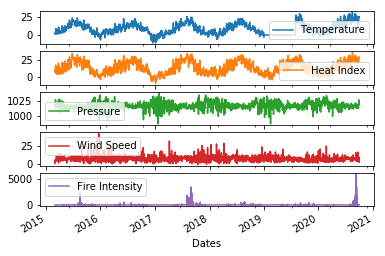

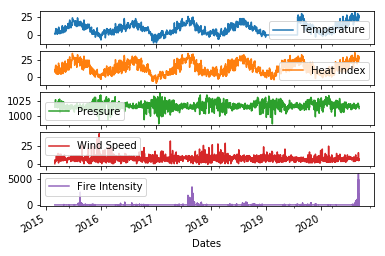

In [31]:
df = bhai
date_time = pd.to_datetime(df.pop('Dates'), format="%Y-%m-%d")
plot_cols = ['Temperature', 'Heat Index', 'Pressure', 'Wind Speed', 'Fire Intensity']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:-600]
plot_features.index = date_time[:-600]
_ = plot_features.plot(subplots=True)

In [32]:
# 70 10 20 split
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [33]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

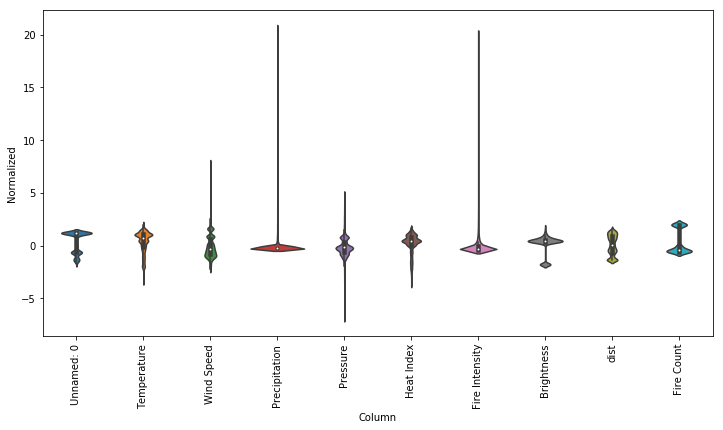

In [34]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [89]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

---

In [38]:
src = pd.get_dummies(df, prefix=['month'])
src

,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count,month_Apr,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,2,1,0.0,1020,10,0.0,0.0,0.000000,0.0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,6,0.0,1014,7,0.0,0.0,0.000000,0.0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,0.0,1022,8,0.0,0.0,0.000000,0.0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,3,0.0,1023,12,0.0,0.0,0.000000,0.0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,6,0.0,1025,13,0.0,0.0,0.000000,0.0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10179,25,3,0.0,1022,28,10.2,315.6,22.686774,8.0,0,...,0,0,0,0,0,0,0,0,0,1
10180,25,3,0.0,1022,28,9.9,318.8,34.084096,8.0,0,...,0,0,0,0,0,0,0,0,0,1
10181,25,3,0.0,1022,28,12.6,324.2,39.198786,8.0,0,...,0,0,0,0,0,0,0,0,0,1
10182,25,3,0.0,1022,28,8.5,318.0,35.317873,8.0,0,...,0,0,0,0,0,0,0,0,0,1


## Regression Take 1

In [39]:
X=src.drop("Fire Intensity", axis=1)
y=src["Fire Intensity"].values.reshape(-1,1)
print(X.shape,y.shape)

(10184, 20) (10184, 1)


In [40]:
# ok data setup epic
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [41]:
a = [X_train, X_test, y_train, y_test]
for m in a:
    print(len(m))

7638
2546
7638
2546


In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:

print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.2287210058097211
Testing Data Score: 0.1919062652265342


---
## Regression Take 2

In [44]:
X_c = src.drop("Fire Count", axis=1)
y_c = src["Fire Count"].values.reshape(-1,1)
print(X_c.shape, y_c.shape)

(10184, 20) (10184, 1)


In [45]:
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, random_state=1)

In [46]:
a = [X_c_train, X_c_test, y_c_train, y_c_test]
for m in a:
    print(len(m))

7638
2546
7638
2546


In [47]:
model_2 = LinearRegression()
model_2.fit(X_c_train, y_c_train)
print(f"Training Data Score: {model_2.score(X_c_train, y_c_train)}")
print(f"Testing Data Score: {model_2.score(X_c_test, y_c_test)}")

Training Data Score: 0.6369123598715382
Testing Data Score: 0.6266753830867551


---

In [48]:
df = pd.merge(final_la_weather, final_la_fire_merged)
# df['Dates'] = pd.to_datetime(df['Dates'])
# mask = (df['Dates'] > '2020-07-01') & (df['Dates'] <= '2000-09-30')
# print(df.loc[mask])
df['date'] = pd.to_datetime(df['Dates'])
mask = (df['date'] > '2020-7-1') & (df['date'] <= '2020-9-30')
hol_out_df = df.loc[mask]

In [49]:
df = hol_out_df
df['Date'] = pd.to_datetime(df['Dates'], format="%Y-%m-%d")
df['month'] = df['Date'].dt.month
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')].drop(columns=['Dates', 'Date', 'date'])
df

,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count,month
3142,19,7,0.1,1017,21,8.2,310.9,66.328417,1,Jul
3143,26,9,0.0,1015,27,89.1,345.0,55.974913,5,Jul
3144,26,9,0.0,1015,27,26.8,324.3,57.370618,5,Jul
3145,26,9,0.0,1015,27,85.8,346.3,65.200724,5,Jul
3146,26,9,0.0,1015,27,76.7,344.3,64.157190,5,Jul
...,...,...,...,...,...,...,...,...,...,...
8518,25,3,0.0,1022,28,10.2,315.6,22.686774,8,Sep
8519,25,3,0.0,1022,28,9.9,318.8,34.084096,8,Sep
8520,25,3,0.0,1022,28,12.6,324.2,39.198786,8,Sep
8521,25,3,0.0,1022,28,8.5,318.0,35.317873,8,Sep


In [50]:
new_la  = pd.get_dummies(df, prefix=['month'])
new_la

,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count,month_Aug,month_Jul,month_Sep
3142,19,7,0.1,1017,21,8.2,310.9,66.328417,1,0,1,0
3143,26,9,0.0,1015,27,89.1,345.0,55.974913,5,0,1,0
3144,26,9,0.0,1015,27,26.8,324.3,57.370618,5,0,1,0
3145,26,9,0.0,1015,27,85.8,346.3,65.200724,5,0,1,0
3146,26,9,0.0,1015,27,76.7,344.3,64.157190,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,25,3,0.0,1022,28,10.2,315.6,22.686774,8,0,0,1
8519,25,3,0.0,1022,28,9.9,318.8,34.084096,8,0,0,1
8520,25,3,0.0,1022,28,12.6,324.2,39.198786,8,0,0,1
8521,25,3,0.0,1022,28,8.5,318.0,35.317873,8,0,0,1


In [51]:
new_la['month_October']=0
new_la['month_November']=0
new_la['month_December']=0
new_la['month_January']=0
new_la['month_February']=0
new_la['month_March']=0
new_la['month_April']=0
new_la['month_May']=0
new_la['month_June']=0
new_la

,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count,month_Aug,...,month_Sep,month_October,month_November,month_December,month_January,month_February,month_March,month_April,month_May,month_June
3142,19,7,0.1,1017,21,8.2,310.9,66.328417,1,0,...,0,0,0,0,0,0,0,0,0,0
3143,26,9,0.0,1015,27,89.1,345.0,55.974913,5,0,...,0,0,0,0,0,0,0,0,0,0
3144,26,9,0.0,1015,27,26.8,324.3,57.370618,5,0,...,0,0,0,0,0,0,0,0,0,0
3145,26,9,0.0,1015,27,85.8,346.3,65.200724,5,0,...,0,0,0,0,0,0,0,0,0,0
3146,26,9,0.0,1015,27,76.7,344.3,64.157190,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,25,3,0.0,1022,28,10.2,315.6,22.686774,8,0,...,1,0,0,0,0,0,0,0,0,0
8519,25,3,0.0,1022,28,9.9,318.8,34.084096,8,0,...,1,0,0,0,0,0,0,0,0,0
8520,25,3,0.0,1022,28,12.6,324.2,39.198786,8,0,...,1,0,0,0,0,0,0,0,0,0
8521,25,3,0.0,1022,28,8.5,318.0,35.317873,8,0,...,1,0,0,0,0,0,0,0,0,0


## PREDICTION
(i should really have split the dataset lol)

In [52]:
#predict FRP values
X_new_fire=new_la.drop("Fire Intensity", axis=1)
new_fire=model.predict(X_new_fire)
len(new_fire)

5381

In [53]:
new_fire

array([[  5.49799967],
       [ 65.81471714],
       [ 25.25861931],
       ...,
       [130.12025258],
       [133.22689891],
       [190.91206603]])

In [54]:
new_fire_list=[]
for i in range(len(new_fire)):
    new_fire_list.append(new_fire[i][0])
new_fire_list

[5.497999670787806,
 65.8147171388353,
 25.258619306244327,
 35.31492959396746,
 35.57770619806104,
 56.479557681705785,
 139.52656783131613,
 155.77643191249092,
 161.51733055041746,
 148.4684057743873,
 181.07400434217806,
 171.7637489608345,
 187.54706972840353,
 125.49163154991777,
 186.20836531831122,
 182.16930326028086,
 225.26002317102245,
 267.9386062915071,
 179.462273909996,
 98.45605753512598,
 84.72939952517936,
 221.849574980149,
 184.4821035820184,
 255.02090599517686,
 280.3043519560388,
 266.38638217083144,
 250.1070251725556,
 294.2362014246641,
 257.9195122593075,
 309.55679651557836,
 267.9129553335892,
 329.654199194431,
 273.83618148273166,
 293.69987618498186,
 247.99638129483225,
 258.91662209289353,
 204.7502956028357,
 193.2089086075278,
 290.52132079925224,
 218.0144993529869,
 268.37439005288724,
 276.1803119061585,
 264.7001012641996,
 254.44727469010684,
 269.13612475193133,
 248.74694808164122,
 257.2383203390174,
 103.42652641061926,
 231.6334851146898,


In [55]:
# prediciton data farme
predict_df=pd.DataFrame({'Fire Intensity': new_fire_list})
f=predict_df

In [56]:
new_dates = pd.date_range(start='2020-10-01', end='2020-11-30', freq='D')
print(new_dates)
print(len(new_dates))

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-10', '2020-10-11', '2020-10-12',
               '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16',
               '2020-10-17', '2020-10-18', '2020-10-19', '2020-10-20',
               '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-24',
               '2020-10-25', '2020-10-26', '2020-10-27', '2020-10-28',
               '2020-10-29', '2020-10-30', '2020-10-31', '2020-11-01',
               '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09',
               '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
               '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21',
               '2020-11-22', '2020-11-23', '2020-11-24', '2020-11-25',
      

In [57]:
predict_df = f.head(len(new_dates))
predict_df['Dates']=list(new_dates)

/home/pseudocodenerd/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
predict_df

,Fire Intensity,Dates
0,5.498000,2020-10-01
1,65.814717,2020-10-02
2,25.258619,2020-10-03
3,35.314930,2020-10-04
4,35.577706,2020-10-05
...,...,...
56,255.406632,2020-11-26
57,132.520173,2020-11-27
58,139.082276,2020-11-28
59,131.997010,2020-11-29


In [59]:
predict_df.to_csv('north_cali_oregon_61_days.csv')

In [49]:
# comined CSV FOR JAISAL

In [62]:
lacsv = pd.read_csv('FINAL_LA_44_DAYS.csv')
sfcsv = pd.read_csv('FINAL_SF_40_DAYS.csv')
phoecsv = pd.read_csv('FINAL_PHOENIX_30_DAYS.csv')
merged = pd.merge(lacsv, sfcsv, on='Dates', how='outer')
final_merged = pd.merge(merged, phoecsv, on='Dates', how='outer')
df = final_merged
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Fire Intensity_x,Dates,Fire Intensity_y,Fire Intensity
0,74.672755,2020-10-01,56.875008,62.170287
1,76.782775,2020-10-02,23.059613,15.453074
2,75.725114,2020-10-03,58.301694,84.317342
3,72.082963,2020-10-04,41.389730,35.599108
4,69.535390,2020-10-05,37.952859,-11.448706
5,79.029996,2020-10-06,53.478314,6.452678
6,80.563014,2020-10-07,18.261467,-14.889214
7,73.666036,2020-10-08,46.624334,54.455350
8,66.687940,2020-10-09,43.255403,-13.095983
9,62.848122,2020-10-10,41.268187,-14.226464


In [63]:
df = df[ ['Dates'] + [ col for col in df.columns if col != 'Dates' ] ]


In [64]:
df

,Dates,Fire Intensity_x,Fire Intensity_y,Fire Intensity
0,2020-10-01,74.672755,56.875008,62.170287
1,2020-10-02,76.782775,23.059613,15.453074
2,2020-10-03,75.725114,58.301694,84.317342
3,2020-10-04,72.082963,41.389730,35.599108
4,2020-10-05,69.535390,37.952859,-11.448706
5,2020-10-06,79.029996,53.478314,6.452678
6,2020-10-07,80.563014,18.261467,-14.889214
7,2020-10-08,73.666036,46.624334,54.455350
8,2020-10-09,66.687940,43.255403,-13.095983
9,2020-10-10,62.848122,41.268187,-14.226464


In [66]:
jaisal = df.rename(columns={'Fire Intensity_x':"Los Angeles, CA", 'Fire Intensity_y': 'San Francisco, CA', "Fire Intensity":"Phoenix, AZ"})

In [67]:
jaisal.to_csv('city_wise(3)-data.csv')